# SVM - Iris
### 

### 引入函數

In [2]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

### 下載資料
#### 利用「長度」 和「寬度」 來預測屬於哪一類 Iries

In [20]:
#用sklearn提供的 Iries 數據集

iris=datasets.load_iris()

# X是花萼與花瓣的長度、寬度的原始資料
# Y是將花分類之後的正確答案

X = iris.data
y = iris.target

### 可以印出來看看資料Iris Plants Database

In [23]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### 將樣本分為 訓練集(train) 與 測試集(test)
- 為避免過度擬和，可使用 sklearn 的 train_test_split
- test_size=0.2 表示測試集佔所有樣本20%，訓練集佔所有樣本80%
- rando_state可用來固定，變免重複執行結果不同

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

###  可視化分佈狀況

In [39]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

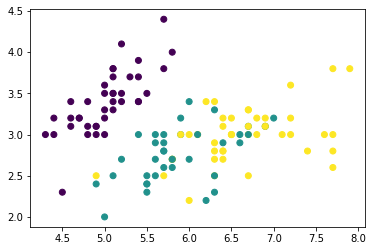

In [35]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

### 建立模型
- SVC裡需要帶3種參數，`kernel(核函數)` 、` C(懲罰係數)`、 `gamma(支援向量多寡)`
- `kernel(核函數)` : 將特徵進行從低維到高維的轉換，但核函數絕就絕在它事先在低維上進行計算，而將實質上的分類效果表現在了高維上，也就是說避免了直接在高維空間中的複雜計算。
- `C (正則化強度) `: C越大，代表錯誤容忍度越低，在訓練集樣本中會區分越精細，因此設定太大容易造成過度擬和 (overfitting) 的問題，若無設定，模型中預設為 1
- `gamma` : gamma參數決定支援向量的多寡，並影響訓練速度與預測速度 。此參數有兩個自動運算選擇，分別為’scale’與’auto’，或是也可以直接指定數值，設定後會以下列方式算出隱含參數，以決定資料映射到新特徵空間後的分佈，在未設定下預設為’scale’。

In [36]:
# 挑選模型：這裡使用svm的SVC分類器

clf = svm.SVC(kernel='rbf',C=1,gamma='auto')

clf.fit (X_train,y_train)

SVC(C=1, gamma='auto')

### 預測
#### `公式：（模型）.predict(（測試集特徵）)`

In [37]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

### 主確度分析
#### `公式：（模型）.score(（特徵）,（目標）)`

In [38]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.975
1.0
